# Support Vector Machines (SMVs)

One of the most popular ML models that can be used for linear or non-linear classification, regression, and outlier detection. SMVs are particularly for classification on complex small- or medium-sized datasets.

### Table of Content
#### 1. Linear SVM Classification
#### 2. Non-Linear SVM Classification
#### 3. SVM Regression


# 1. Linear SVM Classification

The basic idea is to find a decision boundary that not only separates the classes but stays as far away from the closest training instances as possible. Thus, a SVM tries to build the widest street possible between the classes (**large margin classification**).

**Soft Margin Classification**
Since it is not always possible to find a decision boundary that perfectly separates the classes and has a wide margin (for example when there are outliers), we can build a more flexible model that allows for instances to end up "in the middle of the road" or on the other side (which is a **margin violation**) but still tries to keep the road as wide as possible.

The **hyperparameter C** is used to control how wide the street will be and thus influences the amount of margin error. Again, we have a trade-off: a model with only a few margin violations might generalize worse than one with a wider street and more violations.

### 1.1 Example 1: Iris Dataset

In [191]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [192]:
# split data in features and target
# feature: petal width and petal length
# target: Setosa or oher

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==0) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

In [193]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

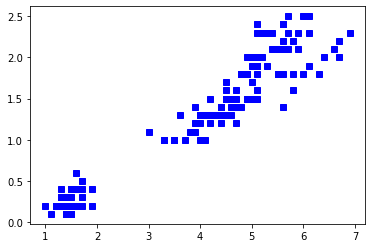

In [194]:
plt.plot(X[:,0], X[:,1], "bs")

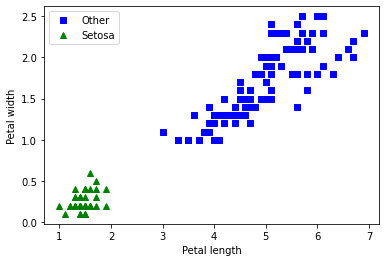

In [195]:
# plot data
import matplotlib.pyplot as plt
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Other")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Model with C=10
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

In [207]:
def plot_SVC_support_vector_and_decision_function(svm_clf, C):
    # obtain the support vectors through the decision function
    decision_function = svm_clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]
    
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Negative class")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Positive class")
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', alpha=0.5)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

    plt.title("C=" + str(C))

**About support vectors**

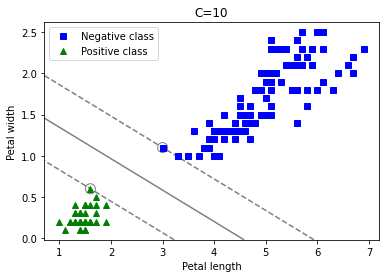

In [208]:
# Plot decision boundaries and support vectors
plot_SVC_support_vector_and_decision_function(svm_clf, 10)

### 1.2 Example 2: Moon dataset

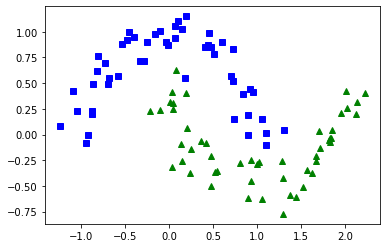

In [170]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)

plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Model with C=1
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf_1.fit(X, y)

# Model with C=20
svm_clf_20 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=5, loss="hinge")),
])

svm_clf_20.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=5, loss='hinge'))])

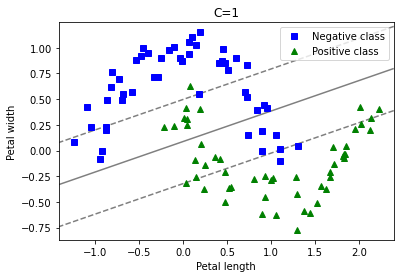

In [184]:
# Plot Decision boundary with C=1
plot_SVC_support_vector_and_decision_function(svm_clf_1, 1)

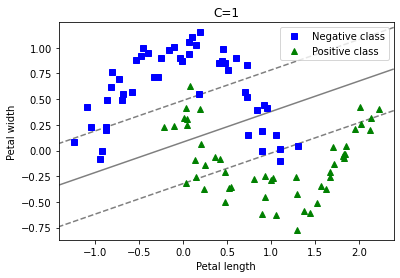

In [185]:
# Plot Decision boundary with C=20
plot_SVC_support_vector_and_decision_function(svm_clf_20, 20)